# **Árboles de decisión**

### Setup

First, let's import a few common modules and ensure MatplotLib plots figures inline. We also check that Python 3.5 or later is installed as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
#np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Clasificación 

#### Entrenamiento 

In [2]:
#Importamos Iris


#visualizamos el dataframe completo para hacernos una idea.



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#Cómo se distribuye el target


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
#Tomamos sólo dos de las cuatro variables de entrada para poder visualizar los datos en scatter plots más adelante.


#Importamos el DecisionTreeClasiffier y el método train_test_split


#Dividimos en train y test.



#Creamos y entrenamos el modelo. 




DecisionTreeClassifier(max_depth=3, random_state=42)

#### Visualización

['setosa' 'versicolor' 'virginica']


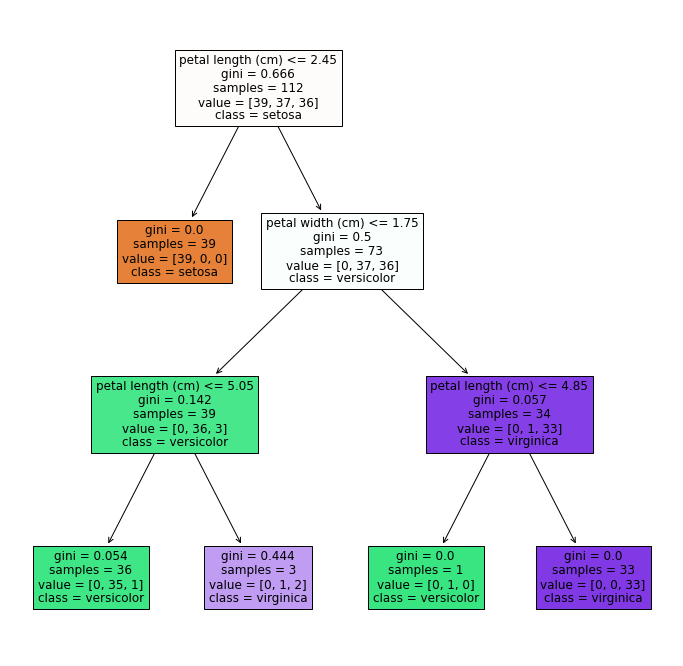

En este caso la mejor partición en el primer nivel resulta que separa totalmente las setosas de las demás especies, con un gini de 0 en el nodo de decisión de la izquierda.En el segundo nivel no separa totalmente virginica de versicolor, el algoritmo escoge la división que arroja el gini más bajo. 

#### Prediccion instancias test

[0 2 1 2 1 1 1 1 1 0 2 1 2 2 0 2 1 1 1 1 0 2 0 1 2 0 2 2 2 1 0 0 1 1 1 0 0
 0]
[0 2 1 2 1 1 1 2 1 0 2 1 2 2 0 2 1 1 2 1 0 2 0 1 2 0 2 2 2 2 0 0 1 1 1 0 0
 0]


### Evaluación

In [8]:
#Evaluamos el accuracy para los datos de train y los datos de test



Accuracy train:  0.9821428571428571
Accuracy test:  0.9210526315789473


In [9]:
#Generamos la matriz de confusión 


array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  3, 11]], dtype=int64)

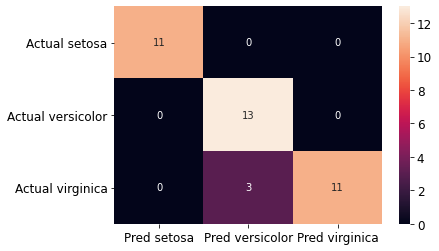

In [10]:
#Creamos el dataframe y pintamos la matriz de confusión con un heatmap





### Predicción 

En primer lugar, pintamos los datos analizados en un scatterplot, que ayuda mucho a visualizar las predicciones.

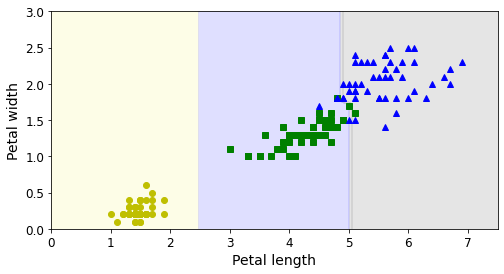

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff', '#aaaaaa'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "gs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "b^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)

plt.show();

In [12]:
#Imprimimos los nombres de las clases para que nos ayuden interpretar las predicciones



array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

##### Predicción de las clases y probabilidades de las clases

Usamos los métodos .predict() y .predict_proba() respectivamente.

array([0])

array([[1., 0., 0.]])

array([1])

array([[0.        , 0.97222222, 0.02777778]])

array([2])

array([[0.        , 0.33333333, 0.66666667]])

### Feature importance

El atributo (feature_importances_) que, una vez entrenado el modelo, devuelve la importancia relativa (de 0 a 1) de cada variable de entrada a efectos de predecir el target. Cuanto más cerca de 1, mayor impacto tiene la variable.


In [19]:
#Como solo hemos usado dos features, solo tendremos dos puntuaciones. 




array([0.59334769, 0.40665231])

## Tendencia al overfitting (non -parametric model)

In [20]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)


In [21]:
make_moons

<function sklearn.datasets._samples_generator.make_moons(n_samples=100, *, shuffle=True, noise=None, random_state=None)>

In [22]:
Xm.shape

(100, 2)

In [23]:
ym.shape

(100,)

C:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

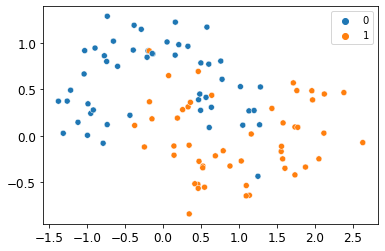

In [24]:
import seaborn as sns

sns.scatterplot(Xm[:,0],Xm[:,1],hue = ym)

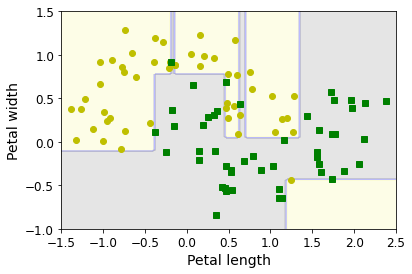

In [25]:
#Montamos el árbol de decisión sin limitar su dimensión

tree_clf_moon= DecisionTreeClassifier(random_state = 42)

tree_clf_moon.fit(Xm,ym)

plot_decision_boundary(tree_clf_moon,Xm,ym,axes = [-1.5,2.5,-1,1.5])

#Hace una separación muy rara, no tiene pinta de ser buena. Parece overfitting. 
                  

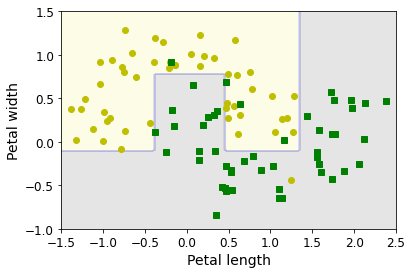

In [26]:
#Ahora le vamos a limitar la profundidad y las divisiones que puede hacer

tree_clf_moon= DecisionTreeClassifier(random_state = 42,
                                     min_samples_leaf = 3)

tree_clf_moon.fit(Xm,ym)

plot_decision_boundary(tree_clf_moon,Xm,ym,axes = [-1.5,2.5,-1,1.5])

El primer árbol de decisiones se entrena con los hiperparámetros predeterminados (es decir, sin restricciones), y el segundo se entrena con min_samples_leaf = 4. 
Es bastante obvio que el primer modelo está sobreajustado y el segundo muy probablemente generalizará mejor.

# Regression trees 

C:\Users\julia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


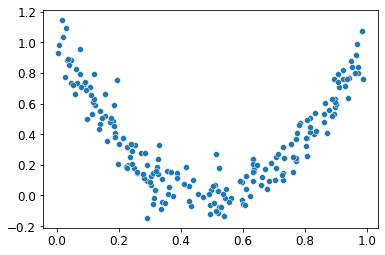

In [27]:
import seaborn as sns
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
sns.scatterplot(X.reshape(m), y.reshape(m));

In [28]:


#Generamos el árbol de decisión y entrenamos




DecisionTreeRegressor(max_depth=3, random_state=42)

In [29]:
#Vemos el R2



0.886898947978226

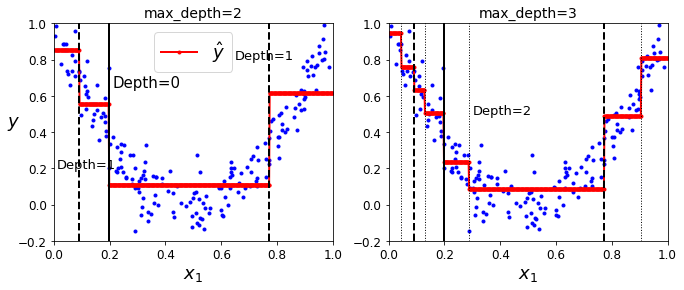

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

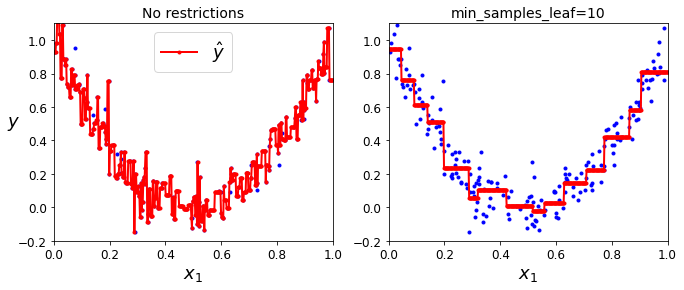

In [31]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()